<a href="https://colab.research.google.com/github/andylynchul/ET5003_Assignments/blob/master/Week%203/ET5003_Etivity2_ALynch_20208189.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [546]:
#@title Current Date
Today = '2021-08-22' #@param {type:"date"}


In [547]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20208189" #@param {type:"string"}
Student_full_name = "Andrew Lynch" #@param {type:"string"}
#@markdown ---

In [548]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [549]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [550]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [551]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [552]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# Functions

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

##Loading Data

In [553]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Path, copy the path from your Drive
Path = '/content/drive/MyDrive/Masters/Year2/ET5003/Week3/Data/'

# House Data
train_data = Path + 'house_train.csv'
test_data = Path + 'house_test.csv'
cost_data = Path + 'true_price.csv'

# train data
df_train = pd.read_csv(train_data)

# test data
df_test = pd.read_csv(test_data)

# test data
df_cost = pd.read_csv(cost_data)

print(df_train.shape)
print(df_test.shape)
print(df_cost.shape)

Mounted at /content/drive
(2982, 17)
(500, 16)
(500, 2)


# Exploritory Data Analysis

In [554]:
df_train.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
1,999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
2,999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
3,9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
4,9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [555]:
df_train.tail()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
2977,12428232,Ballsbridge,2.0,2.0,C3,Dublin,Sherry FitzGerald are delighted to present Apa...,prod,NaN,Prime Location\nManagement Co: Core Property M...,53.338738,-6.237199,NaN,415000.0,sale,apartment,56.0
2978,12428240,Rialto,1.0,3.0,B2,Dublin,Property Team Patrick Moran is delighted to pr...,prod,NaN,Totally refurbished to the highest standard. \...,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.0
2979,12428247,Smithfield,1.0,2.0,C3,Dublin,Earnest estate agents are delighted to present...,prod,Wired for Cable Television,OVERLOOKING THE RIVER LIFFEY \n3RD FLOOR APART...,53.346098,-6.276856,NaN,299000.0,sale,apartment,55.6
2980,12428254,Foxrock,2.0,3.0,C3,Dublin,Janet Carroll Estate Agents are pleased to pre...,prod,"Parking,Gas Fired Central Heating",None,53.273518,-6.178500,NaN,495000.0,sale,end-of-terrace,97.0
2981,12428358,Terenure,2.0,3.0,D2,Dublin,ON VIEW SATURDAY 7 TH MARCH 2020 11:30 AM - 12...,prod,NaN,Charming three-bedroom family home\nMinutes aw...,53.310073,-6.325158,NaN,525000.0,sale,semi-detached,129.3


In [556]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ad_id               2982 non-null   int64  
 1   area                2982 non-null   object 
 2   bathrooms           2931 non-null   float64
 3   beds                2931 non-null   float64
 4   ber_classification  2305 non-null   object 
 5   county              2982 non-null   object 
 6   description_block   2982 non-null   object 
 7   environment         2982 non-null   object 
 8   facility            965 non-null    object 
 9   features            2982 non-null   object 
 10  latitude            2982 non-null   float64
 11  longitude           2982 non-null   float64
 12  no_of_units         59 non-null     float64
 13  price               2892 non-null   float64
 14  property_category   2982 non-null   object 
 15  property_type       2931 non-null   object 
 16  surfac

In [557]:
df_train.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


In [558]:
# Use this to get some high level information about the missing data
df_train.isna().sum()

ad_id                    0
area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

In [559]:
# Find the number of nulls/NaNs in the dataset as a percentage to see if any columns need to be considered for removal
print("Read of missing values as percentage of data set")
df_train.isna().sum()*100/len(df_train)

Read of missing values as percentage of data set


ad_id                  0.000000
area                   0.000000
bathrooms              1.710262
beds                   1.710262
ber_classification    22.702884
county                 0.000000
description_block      0.000000
environment            0.000000
facility              67.639168
features               0.000000
latitude               0.000000
longitude              0.000000
no_of_units           98.021462
price                  3.018109
property_category      0.000000
property_type          1.710262
surface               18.477532
dtype: float64

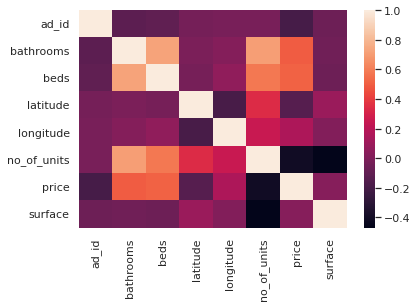

In [560]:
# calculate the correlation matrix
corr = df_train.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Data Preparation


### Feature Selection

Decoded to remove the categorical data as one hot encoding can often lead to low value regressors. https://arxiv.org/pdf/1908.09874.pdf

In [561]:
# Drop the Text Based Features, Low Value Features
# ad_id : Index - no added value
# description_block, features : content based, cannot be transfered to numeric
# no_of_units, faciities : more than 25% with no values
# enviroment, county : no added value
# property_category : data skewed heaviy towards sale - felt it added no value

drop_features = ['ad_id','area','ber_classification','property_category','property_type','property_category','description_block', 'features','no_of_units','facility', 'environment', 'county']

df_train_p = df_train.drop(drop_features, axis=1)
df_test_p = df_test.drop(drop_features, axis=1)

### Categorical Analysis

In [562]:
#Calculate statistics for the categorical attributes.
#df_train_p.describe(include=['object'])

In [563]:
# Identify Cetegorical Data with nan's
print("List of Cats:")
print(df_train_p.select_dtypes(include=['object']).isna().sum())

# Total num Cetegorical Data with nan's
print("\nTotal Count:",df_train_p.select_dtypes(include=['object']).isna().values.sum())

List of Cats:
Series([], dtype: float64)

Total Count: 0.0


In [564]:
# Get a read of Categorical Values
cat_cols = df_train_p.select_dtypes(include=['object'])     #strip out the categorical cols
cat_cols.columns[cat_cols.any()].tolist()           #convert col names to list
for i in cat_cols:                                  #loop through the cols
    print(cat_cols[i].value_counts(),"\n")          #print the summary to analyse

In [565]:
# Get a read of Categorical Values Visualy (Frequency Distribution Plots)
for i in cat_cols:                                  #loop through the cols
    plot_count = cat_cols[i].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(plot_count.index, plot_count.values, alpha=0.9)
    plt.title('Frequency Distribution of '+cat_cols[i].name)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(cat_cols[i].name, fontsize=12)
    plt.show()

#### Imputting Categorical Features

I was interested to know how to approach filling in the missing data. Looking at source: https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893 - is presents several methods to impute missing categorical data.

1) Frequent Categorical: Replace NAN with the most frequently appearing category

2) Adding a Variable to Capture NAN: Same as above but add an additional column (1/0) to mark the columns that have imputed data to allow a weighting to be applied to further analysis

3) Create a New Random Category: fill in the NAN will a defined new category e.g.: Not Available, Missing, Unknown etc

To categorically decide on the approach this would need some further analysis on the MAR, MCAR, MNAR status of each using some test for dependence amongst variables: https://towardsdatascience.com/statistical-test-for-mcar-in-python-9fb617a76eac

Approach here was to use method three as is seems to be a popular choice without having to apply randomness analysis

In [566]:
#inpute all missing categorical values
df_train_p[df_train_p.select_dtypes("object").columns] = df_train_p.select_dtypes("object").fillna("unknown")
df_test_p[df_test_p.select_dtypes("object").columns] = df_test_p.select_dtypes("object").fillna("unknown")

# Relook at missing value
print("List of Cats with NA after imputing:")
print(df_train_p.select_dtypes(include=['object']).isna().sum())

# Total num Cetegorical Data with nan's
print("\nTotal Count:", df_train_p.select_dtypes(include=['object']).isna().values.sum())

List of Cats with NA after imputing:
Series([], dtype: float64)

Total Count: 0.0


#### Categorical Data Classification
Categorical Data is nominal so apply one-hot encoding

In [567]:
#one hot encode categorical fields

# strip out the columns of type object that have nan's
cols_na = df_train_p.select_dtypes(include=['object'])
cols_na = cols_na.columns[cols_na.any()].tolist()

# now one-hot encode all categorical columns with nan
df_train_p = pd.get_dummies(df_train_p, columns=cols_na, 
                        dummy_na=True, 
                        drop_first=True)

df_test_p = pd.get_dummies(df_test_p, columns=cols_na, 
                        dummy_na=True, 
                        drop_first=True)

df_train_p.tail()

,bathrooms,beds,latitude,longitude,price,surface
2977,2.0,2.0,53.338738,-6.237199,415000.0,56.0
2978,1.0,3.0,53.335793,-6.294268,485000.0,101.0
2979,1.0,2.0,53.346098,-6.276856,299000.0,55.6
2980,2.0,3.0,53.273518,-6.178500,495000.0,97.0
2981,2.0,3.0,53.310073,-6.325158,525000.0,129.3


## Numerical Data Analysis

In [568]:
#Calculate statistics for the categorical attributes.
print(df_train_p.select_dtypes(exclude=['object']).isna().sum())

bathrooms     51
beds          51
latitude       0
longitude      0
price         90
surface      551
dtype: int64


In [569]:
# First filter out those rows which
# does not contain any data
df_train_p = df_train_p.dropna(how = 'any')
df_train_p.drop(df_train_p[df_train_p['beds'] == 0].index, inplace = True)
df_train_p.drop(df_train_p[df_train_p['bathrooms'] == 0].index, inplace = True)

print(df_train_p.select_dtypes(exclude=['object']).isna().sum())

# Apply to test data set
#df_test_p = df_test_p.dropna(how = 'any')
#df_test_p.drop(df_test_p[df_test_p['beds'] == 0].index, inplace = True)
#df_test_p.drop(df_test_p[df_test_p['bathrooms'] == 0].index, inplace = True)

bathrooms    0
beds         0
latitude     0
longitude    0
price        0
surface      0
dtype: int64


## Detection & Removal of Outliers

In [570]:
# Function to Detection Outlier on one-dimentional datasets.
def remove_outliers(dframe, feature):
    '''Function to Detect / Remove Outliers'''
  
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(dframe[feature])
    random_data_mean = np.mean(dframe[feature])
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    dframe = dframe.drop(dframe[(dframe[feature] < lower_limit) | (dframe[feature] > upper_limit)].index)

    return dframe

def plot_box_hist(dframe, features):
    '''Function to plot Box / Histogram pair for any feature'''
    no_feats = len(features)
  
    figH = plt.figure(figsize=(30,no_feats*5))

    for i in range(0, no_feats): 
        ax1 = figH.add_subplot(no_feats, 2, (i*2)+1)
        ax1.set_title("Boxplot of "+features[i])
        dframe.boxplot(column=[features[i]])

        ax2 = figH.add_subplot(no_feats, 2, (i*2)+2)
        ax2.set_title("Histogram of "+features[i])
        dframe[features[i]].hist(bins=20)

    plt.show()


Analysis of outliers


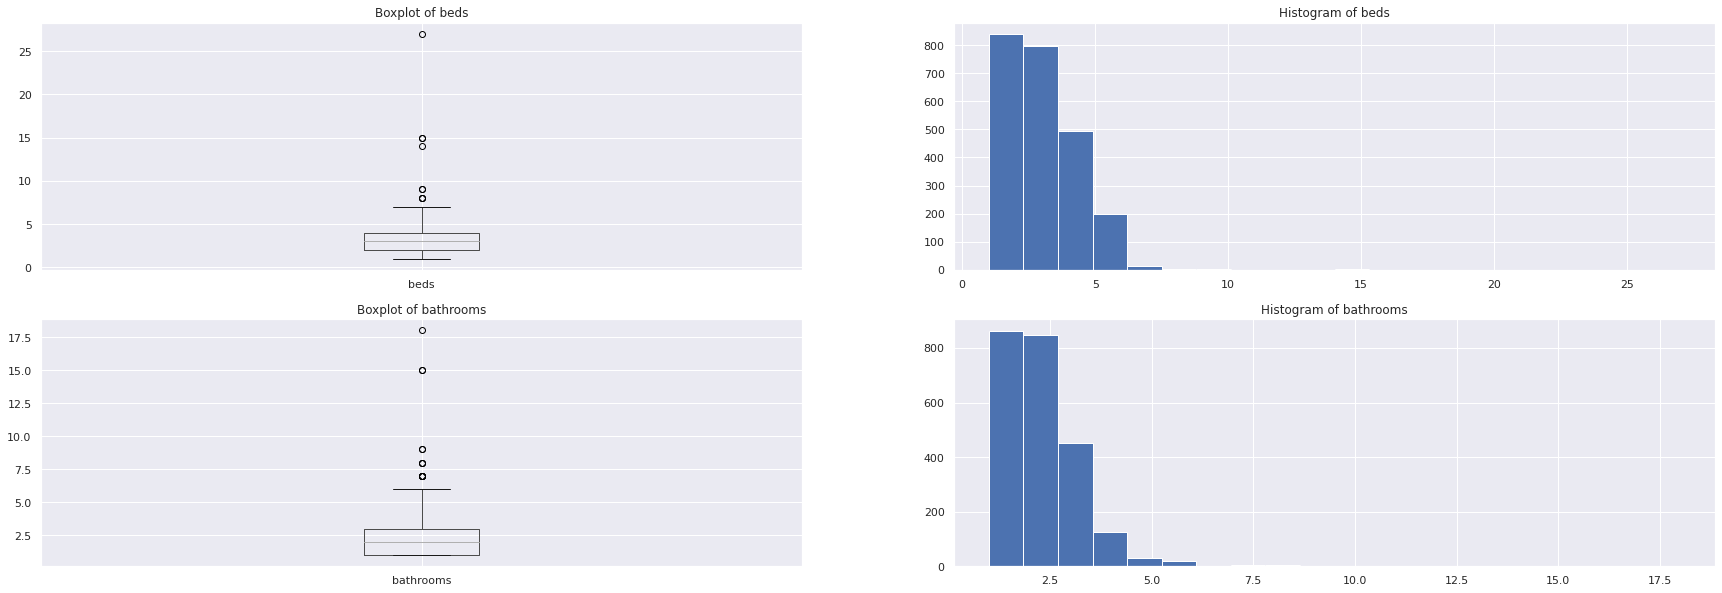

(2349, 6)
After outliers have been removed


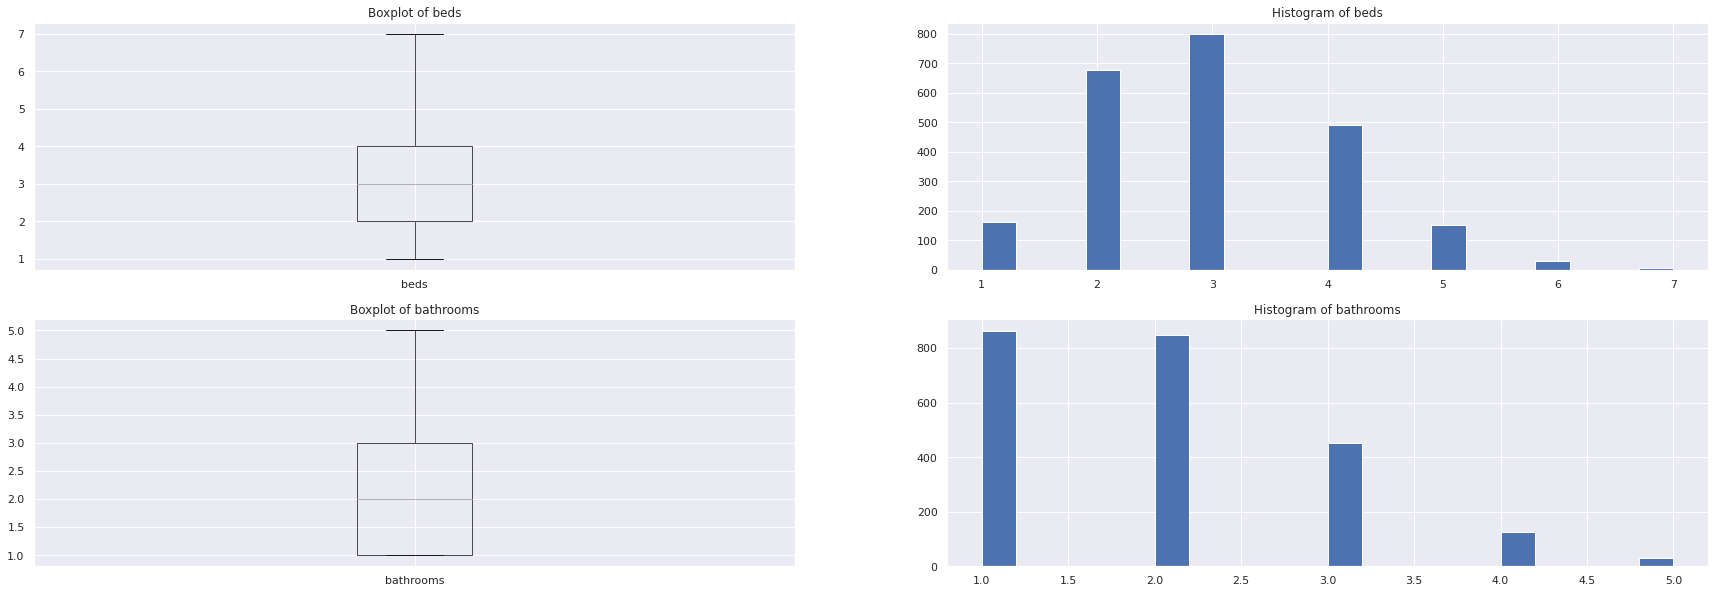

(2314, 6)


In [571]:
#Select features to include in plots
include_featues = ['beds','bathrooms']

#run print function
print("Analysis of outliers")
plot_box_hist(df_train_p, include_featues)
print(df_train_p.shape)

print("After outliers have been removed")
for i in range(0, len(include_featues)): 
    df_train_p = remove_outliers(df_train_p,include_featues[i])
    #df_test_p = remove_outliers(df_test_p,include_featues[i])

#run print function
plot_box_hist(df_train_p, include_featues)
print(df_train_p.shape)

## Training & Test Data

### Train dataset

In [572]:
# show first data frame rows 
df_train_p.head()

,bathrooms,beds,latitude,longitude,price,surface
15,3.0,5.0,53.400454,-6.445730,935000.0,321.0
26,4.0,4.0,53.316410,-6.385214,485000.0,144.0
27,3.0,5.0,53.401414,-6.446634,935000.0,321.0
35,5.0,5.0,53.375377,-6.056749,1475000.0,312.0
38,2.0,2.0,53.372130,-6.338466,410000.0,83.0


### Test dataset

In [573]:
# show first data frame rows 
df_test_p.head()

,bathrooms,beds,latitude,longitude,surface
0,2.0,4.0,53.566881,-6.101148,142.0
1,2.0,3.0,53.362992,-6.452909,114.0
2,3.0,4.0,53.454198,-6.262964,172.0
3,4.0,3.0,53.354402,-6.458647,132.4
4,1.0,3.0,53.336530,-6.393587,88.0


### Expected Cost dataset

In [574]:
# Generate descriptive statistics
df_cost.head()

,Id,Expected
0,12373510,875000.0
1,12422623,355000.0
2,12377408,440000.0
3,12420093,425000.0
4,12417338,265000.0


In [575]:
print(df_train_p.shape)
print(df_test_p.shape)
print(df_cost.shape)

(2314, 6)
(500, 5)
(500, 2)


# PIECEWISE REGRESSION

In [586]:
# split data into training and test
from sklearn.model_selection import train_test_split

X = df_train_p.drop("price",axis=1)
y = df_train_p["price"]

# training: 70% (0.7), test: 30% (0.3)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

## Full Model

In [603]:
# train set, input columns
Xs_train = X_train
# train set, output column, cost
ys_train = y_train.values.reshape(-1,1) 

# test set, input columns
Xs_test = df_test_p.iloc[:,0:].values 
# test set, output column, cost
y_test = df_cost.iloc[:,1:2].values

In [615]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

# Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xs_train)
Xn_train = xscaler.transform(Xs_train)

#Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xs_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [616]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

Finished [100%]: Average Loss = 1,694.1


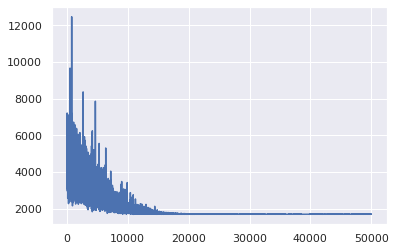

In [617]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [618]:
# samples from the posterior
posterior = approximation.sample(5000)

In [621]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  355635.0265060201
MAPE =  0.649407653752699


## Clustering

### Full Model

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)


### Clusters

In [ ]:
# train clusters



In [ ]:
# test clusters


## Piecewise Model

In [ ]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])



##Simulations

### Only Cluster 0

## Overall

## Test set performance

### PPC on the Test set



# SUMMARY